In [ ]:
import numpy as np
from math import factorial, exp, log


def caso_4A(R,NTU,N_p,N_r):
    # Cálculos iniciales
    N = N_p * N_r
    rho = exp(-NTU / N)
    lambda_ = R * N_r * (1 - rho)
    gamma = np.zeros((N + 1, N_p + 1, N_r + 1))
    beta = np.zeros((N + 1, N_p + 1, N_r + 1))
    # Inicialización de variables
    tau_F = [1]
    alpha = np.zeros((N + 1, N_p + 1, N_r + 1))
    
    


    for p in range(1, N_p + 1):
        tau = np.zeros((N_p + 1, 1))
        tau[p-1, 0] = 1
        for l in range(1, 3):
            for q in range(1, N_r + 1):     
                N_b = np.zeros(N_r+1)
                N_c = np.zeros(N_r+1)
                N_a = np.zeros(N_r+1)
                if N_p % 2 == 0:
                    i = N_p / 2
                    N_b[q-1] = (i - 1) * N_r - 1 + q
                    N_c[q-1] = N_b[q-1]
                    N_a[q-1] = N_c[q-1] - 1
                    N_alpha = i * N_r - 1
                    N_beta = N_alpha
                   
                else:
                    i = (N_p + 1) / 2
                    N_b[q-1] = (i - 1) * N_r - 1 + q
                    N_c[q-1] = N_b[q-1]
                    N_a[q-1] = N_c[q-1] - 1
                    N_alpha = (i - 1) * N_r - 1
                    N_beta = N_alpha
                

                if N_a[q-1] < 0:
                    N_a[q-1] = 0
                if N_b[q-1] < 0:
                    N_b[q-1] = 0
                    N_c[q-1] = 0
                if N_alpha < 0:
                    N_alpha = 0
                    N_beta = 0
               
                s_beta = np.zeros((N_p + 1, N_r + 1))
                s_beta[p-1, q-1] = 0
                
                
                
    
                for k in range(0, int(N_beta + 1)):
                    s_beta1 = 0
                    for j in range(k, int(N_beta + 1)):
                        s_beta1 += alpha[j, p-1, q-1] * factorial(j) * (-1 / (2 * lambda_)) ** (j - k)
                    beta[k, p-1, q-1] = (1 / (2 * factorial(k))) * s_beta1
                    s_beta[p-1, q-1] += beta[k, p-1, q-1]
                    gamma[k, p-1, q-1] = rho * alpha[k, p-1, q-1] + (1 - rho) * beta[k, p-1, q-1]
                    if q != N_r:
                        alpha[k, p-1, q ] = gamma[k, p-1, q-1]

                for k in range(0,int( N_a[q-1] + 1)):
                    s_beta1 = 0
                    for j in range(k, int(N_beta + 1)):
                        s_beta1 += alpha[j, p-1, q-1] * factorial(j) * (-1 / (2 * lambda_)) ** (j - k)
                    beta[k, p-1, q-1] = (1 / (2 * factorial(k))) * s_beta1
                    gamma[k, p-1, q-1] = rho * alpha[k, p-1, q-1] + (1 - rho) * beta[k, p-1, q-1]
                    if q != N_r:
                        alpha[k, p-1, q ] = gamma[k, p-1, q-1]


                s_b2 = np.zeros((N_p + 1, N_r + 1))
                s_b2[p-1, q-1] = 0
                b = np.zeros((N + 1, N_p + 1, N_r + 1))
                b1 = np.zeros((N + 1, N_r + 1))
                b2 = np.zeros((N + 1, N_p + 1, N_r + 1))
                a = np.zeros((N + 1, N_p + 1, N_r + 1))
                a1 = np.zeros((N + 1, N_r + 1))
                a2 = np.zeros((N + 1, N_p + 1, N_r + 1))
                c = np.zeros((N + 1, N_p + 1, N_r + 1))
                c1 = np.zeros((N + 1, N_r + 1))
                c2 = np.zeros((N + 1, N_p + 1, N_r + 1))
    
                for k in range(0, int(N_b[q-1] + 1)):
                   
                    a1[k, 0] = 0
                    a2[k, p-1, 0] = a[k, p-1, 0]
                    
                    if k >= 1:
                        b[k, p-1, q-1] = (lambda_ * a[k - 1, p-1, q-1]) / k
                        b1[k, q-1] = (lambda_ * a1[k - 1, q-1]) / k
                        b2[k, p-1, q-1] = (lambda_ * a2[k - 1, p-1, q-1]) / k
                    else:
                        b[0, p-1, q-1] = tau[p-1, 0] - beta[0, p-1, q-1]
                        b1[0, q-1] = 1
                        b2[0, p-1, q-1] = -beta[0, p-1, q-1]
                    s_b2[p-1, q-1] += b2[k, p-1, q-1]
                    c[k, p-1, q-1] = rho * a[k, p-1, q-1] + (1 - rho) * b[k, p-1, q-1]
                    c1[k, q-1] = rho * a1[k, q-1] + (1 - rho) * b1[k, q-1]
                    c2[k, p-1, q-1] = rho * a2[k, p-1, q-1] + (1 - rho) * b2[k, p-1, q-1]
                    if q != N_r:
                        a[k, p-1, q ] = c[k, p-1, q-1]
                        a1[k, q ] = c1[k, q-1]
                        a2[k, p-1, q] = c2[k, p-1, q-1]

            if p != N_p:
                for k in range(0, int(N_alpha + 1)):
                    s_alpha = 0
                    for j in range(k, int(N_alpha + 1)):
                        s_alpha += c[j, p-1, N_r-1] * (factorial(j) / factorial(j - k))
                    alpha[k, p , 0] = ((-1) ** k) * (exp(-lambda_) / factorial(k)) * s_alpha

                for k in range(0, int(N_a[q-1] + 1)):
                    s_a = 0
                    for j in range(k, int(N_a[q-1] + 1)):
                        s_a += gamma[j, p-1, N_r-1] * (factorial(j) / factorial(j - k))
                    a[k, p , 0] = ((-1) ** k) * (exp(lambda_) / factorial(k)) * s_a
            
            s_g = np.zeros(N_p + 1)
            s_b1 = np.zeros(N_p + 1)
            s_g[p-1] = 0
            s_b1[p-1] = 0
            for q in range(1, N_r + 1):
                s_g[p-1] += (exp(-lambda_) * s_b2[p-1, q-1] + exp(lambda_) * s_beta[p-1, q-1])
                for k in range(0, q):
                    s_b1[p-1] += b1[k, q-1]
            
            f = np.zeros(N_p + 1)
            g = np.zeros(N_p + 1)
            f[p-1] = (exp(-lambda_) / N_r) * s_b1[p-1]
            g[p-1] = (1 / N_r) * s_g[p-1]
            tau[p-1, 0] = (tau_F[p-1] - g[p-1]) / f[p-1]
            tau_F.append(tau[p-1, 0])

    # Cálculos finales
    P = (tau[N_p-1, 0] - 1) / (R * tau[N_p-1, 0])
    if R == 1:
        chi = P / (1 - P)
    else:
        chi = (1 / (R - 1)) * log((1 - P) / (1 - R * P))

    F = chi / NTU
    return F,P


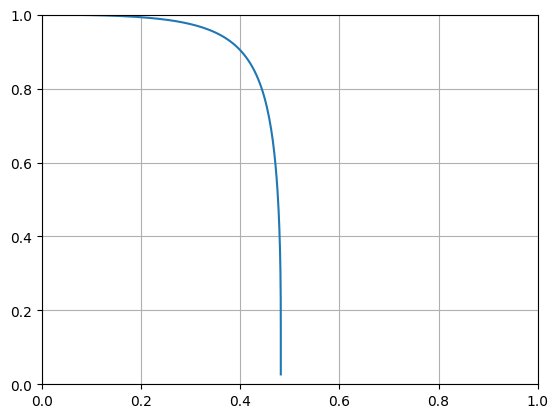

In [127]:

import matplotlib.pyplot as plt

N_p = 2  
N_r = 1   
NTU = np.geomspace(0.0001,100,300)   
F = np.zeros(len(NTU)) 
P = np.zeros(len(NTU)) 
R=2
for i,NUT in enumerate(NTU):
    F[i],P[i] =caso_4A(R,NUT,N_p,N_r)  

plt.plot(P,F)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.show()
